In [1]:
import sys
import os
import ssl
import certifi
import pandas as pd
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context

# Add src/ to Python path
# sys.path.append(os.path.abspath(os.path.join("..", "src")))
# Add the root of the project (not just src) to sys.path
sys.path.append(os.path.abspath(".."))

os.environ['SSL_CERT_FILE'] = certifi.where()

# Import function
from src.data.download_data import download_stock_data

In [2]:
# Download stock data

# df = ticker.history(start="2022-01-01", end="2023-01-01")
ticker = "JOBY"
df = download_stock_data(ticker, "2024-05-20", "2024-06-03")

if df is not None:
    print(f"[✓] Data shape: {df.shape}")
    display(df.head())
else:
    print("[!] Data download failed.")

# if df is None:
#     print("[!] Data download failed.")
# else:
#     print(f"[✓] Data shape: {df.shape}")
#     display(df.head())

📥 Downloading JOBY from Polygon.io...
[✓] Saved to data/raw/JOBY.csv
[✓] Data shape: (10, 6)


,Date,Open,High,Low,Close,Volume
0,2024-05-20 04:00:00,5.03,5.1154,4.910,4.95,5166964.0
1,2024-05-21 04:00:00,4.95,5.1800,4.885,4.89,5787241.0
2,2024-05-22 04:00:00,4.91,4.9400,4.810,4.87,3494916.0
3,2024-05-23 04:00:00,4.92,4.9305,4.760,4.81,3853438.0
4,2024-05-24 04:00:00,4.84,4.9500,4.790,4.91,3236605.0


In [3]:
# Quick summary of the data
if df is not None:
    print("\nData Summary:")
    display(df.describe())

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nDate Range:")
    print(f"From {df['Date'].iloc[0]} to {df['Date'].iloc[-1]}")


Data Summary:


,Date,Open,High,Low,Close,Volume
count,10,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,2024-05-26 08:48:00,4.898000,4.982590,4.799500,4.854000,4.076846e+06
min,2024-05-20 04:00:00,4.750000,4.805000,4.670000,4.700000,3.236605e+06
25%,2024-05-22 10:00:00,4.847500,4.932875,4.765000,4.822500,3.520519e+06
50%,2024-05-26 04:00:00,4.915000,4.975000,4.800000,4.870000,3.725344e+06
75%,2024-05-29 22:00:00,4.957500,5.022500,4.845000,4.885000,4.614586e+06
max,2024-06-03 04:00:00,5.030000,5.180000,4.910000,4.950000,5.787241e+06
std,NaN,0.085739,0.110914,0.074478,0.068346,8.768215e+05



Missing Values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Date Range:
From 2024-05-20 04:00:00 to 2024-06-03 04:00:00


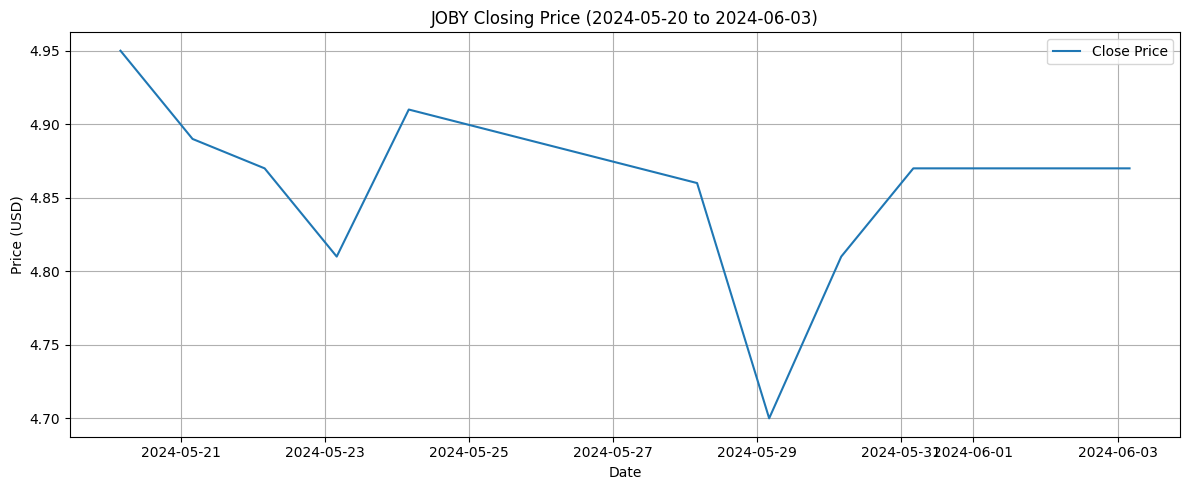

In [4]:
# Plot the closing price
if df is not None:
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"], label="Close Price")
    # plt.title("Closing Price (2022)")
    plt.title(f"{ticker} Closing Price ({df['Date'].iloc[0].date()} to {df['Date'].iloc[-1].date()})")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
import sys
print(sys.executable)

/Users/tony/AlphaVestra/.venv/bin/python
